# __Regresiones Robustas__

Son tecnicas de regresion que resisten mejor los efectos de valores atipicos en los datos. A diferencia de la regresion lineal estandar, que minimiza el error cuadratico medio (MSE) y puede verse afectada por outliers, las regresiones robustas utilizan funciones de perdida menos sensibles a los outliers.

Por lo general siempre se cuenta con una fase de preprocesamiento en la cual se eliminan o transforman datos y se tratan los outliers. Sin embargo, hay ocasiones donde se requiere tratar estos valores directamente durante la aplicacion del modelo y es alli donde toman relevancia los modelos robustos que facilitan este proceso. 

Debemos entender que los valores atipicos son observaciones que no siguen el patron de las demas observaciones y violan los supuestos en los que se basa MSE lo que compromete el resultado de la regresion lineal.

Las tecnicas de regresion robusta que nos ofrece Scikit - Learn son:

- Huger Regressor.
- RANSAC Regressor.
- TheilSenRegressor.

En lo que sigue veamos como funciona y como se implementa cada una de ellas

# __Huger Regressor__

La regresion Huber modifica la funcion de perdida de la regresion lineal para reducir el impacto de los valores atipicos. Combina las fortalezas del Error Cuadratico Medio (MSE) y del Error Absoluto Medio (MAE), cambiando de MSE a MAE cuando los errores superan un umbral especifico representado por $\delta$

La funcion de perdida de Huber viene representada por:

$$L_{\delta}(r) = \left\{\begin{matrix}
\frac{1}{2}r^2 & si \left | r\right | \leq \delta\\
\delta(\left | r\right | - \frac{1}{2}\delta) &  si \left | r\right | > \delta\\
\end{matrix}\right.$$

Donde,

- $r = y_i - \hat{y_{i}}$, es el error entre la prediccion y el valor real (MSE).

- $\delta$ es un parametro que define cuando el error deja de ser cuadratico (MSE) y pasa a ser lineal (MAE).

Si el error es pequeno ($\left | r\right | \leq \delta$) tratamos el outlier como un dato confiable y lo penalizamos con MSE. En cambio, si el error es grande ($\left | r\right | > \delta$) tratamos el outlier con mayor severidad penalizandolo con MAE. Esto hace que la regresion de Huber considere los outliers y los penalice ligeramente haciendose resistente frente a ellos. 

## Como funciona?

Vamos a ajustar un modelo a un conjunto de datos que contiene outliers usando la regresion Huber. Los datos vienen representados en la siguiente tabla:

| $x_i$ | $y_i$               |
| ----- | ------------------- |
| 1     | 2                   |
| 2     | 4                   |
| 3     | 100       ← outlier |

Probemos un modelo cuyos parametros los definimos como $w = 1.5$ y $b=0.5$. La ecuacion del modelo nos queda:

$$\hat{y} = 1.5x + 0.5$$

Procedemos a calcular las predicciones $\hat{y_i}$ que arroja el modelo para cada dato.

- Para $x=1$:   $\hat{y_1} = 1.5(1) + 0.5 = 1.5 + 0.5 \Rightarrow \hat{y_1} = 2$

- Para $x=2$:   $\hat{y_2} = 1.5(2) + 0.5 = 3.0 + 0.5 \Rightarrow \hat{y_1} = 3.5$

- Para $x=3$:   $\hat{y_3} = 1.5(3) + 0.5 = 4.5 + 0.5 \Rightarrow \hat{y_1} = 5$

Ahora calculamos error entre las predicciones del modelo y el valor real.

- $r_1 = y_1 - \hat{y_1} = 2 - 2 = 0$

- $r_2 = y_2 - \hat{y_2} = 4 - 3.5 = 0.5$

- $r_3 = y_1 - \hat{y_1} = 100 - 5 = 95$

Sabemos que la funcion de perdida de Huber viene dada por:

$$L_{\delta}(r) = \left\{\begin{matrix}
\frac{1}{2}r^2 & si \left | r\right | \leq \delta\\
\delta(\left | r\right | - \frac{1}{2}\delta) &  si \left | r\right | > \delta\\
\end{matrix}\right.$$

Calculamos la __funcion de costo de Huber para cada dato__, seleccionando el valor del delta como $\delta = 1$. 

__Para__ $r_1 = 0$, vemos que $\left | r\right | \leq \delta$ por tanto, utilizamos la ecuacion que cumple esta condicion:

$$L(r_1) = \frac{1}{2}(0)^2 = 0$$

__Para__ $r_2 = 0.5$, vemos que $\left | r\right | \leq \delta$ por tanto, utilizamos la misma ecuacion anterior:

$$L(r_2) = \frac{1}{2}(0.5)^2 = 0.125$$

__Para__ $r_3 = 95$, vemos que $\left | r\right | > \delta$ por tanto, utilizamos la ecuacion que cumple la condicion:

$$L(r_3) = 1(95 - 0.5) = 94.5$$

El costo total de Huber viene dado por el promedio de la perdida de Huber para cada dato:

$$L_{\delta} = \frac{1}{3}(L_1 + L_2 + L_3) = \frac{1}{3}(0 + 0.125 + 94.5) = 31.54$$

Ahora, calculamos la __funcion de costo de la regresion estandar para cada dato__, que viene expresada mediante la siguiente ecuacion:

$$L_{MSE} =  \frac{1}{2}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{2}r^2$$

__Para__ $r_1 = 0$ tenemos,

$$L_1 = \frac{1}{2}(0)^2 = 0$$

__Para__ $r_2 = 0.5$ tenemos,

$$L_2 = \frac{1}{2}(0.5)^2 = 0.125$$

__Para__ $r_3 = 95$ tenemos,

$$L_3 = \frac{1}{2}(95)^2 = \frac{1}{2}(9025) = 4512.5$$

El costo total de MSE viene dado por el promedio de la perdida MSE de cada dato

$$L_{MSE} = \frac{1}{3}(L_1 + L_2 + L_3) =\frac{4512.625}{3} = 1504.21$$

> La funcion de costo nos devuelve el error del modelo. Un error grande implica que el modelo no se ajusta bien a los datos. Un error cercanos a cero sugiere un sobreajuste del modelo a los datos.

> Al comparar el costo total de $L_{\delta}$ y $L_{MSE}$ se evidencia que Huber es mucho mas bajo que MSE. Huber penaliza los outliers suavemente sin ignorarlos lo que lo hace resistente a valores extremos. Mientras que MSE explota frente a outliers lo que lo hace sensible a estos valores.

## Implementacion de la Regresion Huber con Scikit Learn

En el siguiente ejemplo vamos a comparar la regresion lineal con la regresion Huber y mostrar las ventajas de utilizar esta ultima ante la presencia de outliers. Analizaremos un conjunto de 200 datos artificiales.

In [1]:
# Librerias
import numpy as np
import random
from sklearn.datasets import make_regression  # generacion de datos artificiales
from sklearn.linear_model import LinearRegression, HuberRegressor # modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
# Configurar el estilo de los gráficos
plt.style.use('seaborn-colorblind')
sns.set_palette("husl")

In [ ]:
# Establecer semilla para reproducibilidad
np.random.seed(42)

# Generar datos artificiales con comportamiento lineal
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=3, bias=50, random_state=1)

 # add some artificial outliers
for i in range(10):
        factor = random.randint(2, 4)
if random.random() > .5:
    X[i] += factor * X.std()
else:
    X[i] -= factor * X.std()


In [13]:
# Crear y entrenar los modelos
linear_reg = LinearRegression()
huber_reg = HuberRegressor(epsilon=1.35, alpha=0.0)  # epsilon controla la robustez

# Entrenar los modelos
linear_reg.fit(X, y)
huber_reg.fit(X, y)

# Hacer predicciones
y_pred_linear = linear_reg.predict(X)
y_pred_huber = huber_reg.predict(X)

# Calcular métricas de error
mse_linear = mean_squared_error(y, y_pred_linear)
mse_huber = mean_squared_error(y, y_pred_huber)
mae_linear = mean_absolute_error(y, y_pred_linear)
mae_huber = mean_absolute_error(y, y_pred_huber)
r2_linear = r2_score(y, y_pred_linear)
r2_huber = r2_score(y, y_pred_huber)

print("\n" + "="*60)
print("COMPARACIÓN DE MÉTRICAS DE ERROR")
print("="*60)
print(f"{'Métrica':<20} {'Regresión Lineal':<20} {'Regresión Huber':<20}")
print("-" * 60)
print(f"{'MSE':<20} {mse_linear:<20.2f} {mse_huber:<20.2f}")
print(f"{'MAE':<20} {mae_linear:<20.2f} {mae_huber:<20.2f}")
print(f"{'R²':<20} {r2_linear:<20.3f} {r2_huber:<20.3f}")
print("-" * 60)
print(f"Mejora MSE: {((mse_linear - mse_huber) / mse_linear * 100):.1f}%")
print(f"Mejora MAE: {((mae_linear - mae_huber) / mae_linear * 100):.1f}%")



COMPARACIÓN DE MÉTRICAS DE ERROR
Métrica              Regresión Lineal     Regresión Huber     
------------------------------------------------------------
MSE                  15.64                18.11               
MAE                  2.70                 2.40                
R²                   0.809                0.779               
------------------------------------------------------------
Mejora MSE: -15.8%
Mejora MAE: 10.9%


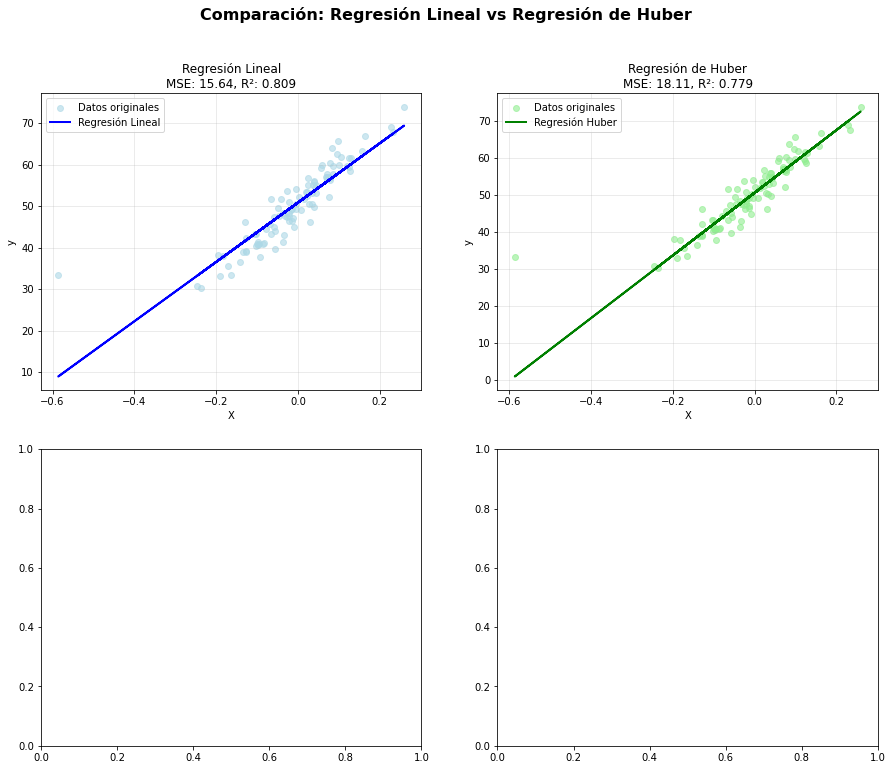

In [14]:
# Crear visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparación: Regresión Lineal vs Regresión de Huber', fontsize=16, fontweight='bold')

# Gráfico 1: Regresión Lineal
axes[0, 0].scatter(X, y, alpha=0.6, color='lightblue', label='Datos originales')
#axes[0, 0].scatter(X[outlier_indices], y[outlier_indices], color='red', s=100, 
#                   label=f'Outliers (n={n_outliers})', alpha=0.8)
axes[0, 0].plot(X, y_pred_linear, color='blue', linewidth=2, label='Regresión Lineal')
axes[0, 0].set_title(f'Regresión Lineal\nMSE: {mse_linear:.2f}, R²: {r2_linear:.3f}')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('y')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Regresión de Huber
axes[0, 1].scatter(X, y, alpha=0.6, color='lightgreen', label='Datos originales')
#axes[0, 1].scatter(X[outlier_indices], y[outlier_indices], color='red', s=100,
#                   label=f'Outliers (n={n_outliers})', alpha=0.8)
axes[0, 1].plot(X, y_pred_huber, color='green', linewidth=2, label='Regresión Huber')
axes[0, 1].set_title(f'Regresión de Huber\nMSE: {mse_huber:.2f}, R²: {r2_huber:.3f}')
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('y')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

Regresión Lineal
MSE: 2283.6267856109434
MAE: 31.055957171297575
R2: 0.569112008231958

Regresión Huber
MSE: 3519.0621448883617
MAE: 19.060865553459806
R2: 0.3360028748689685


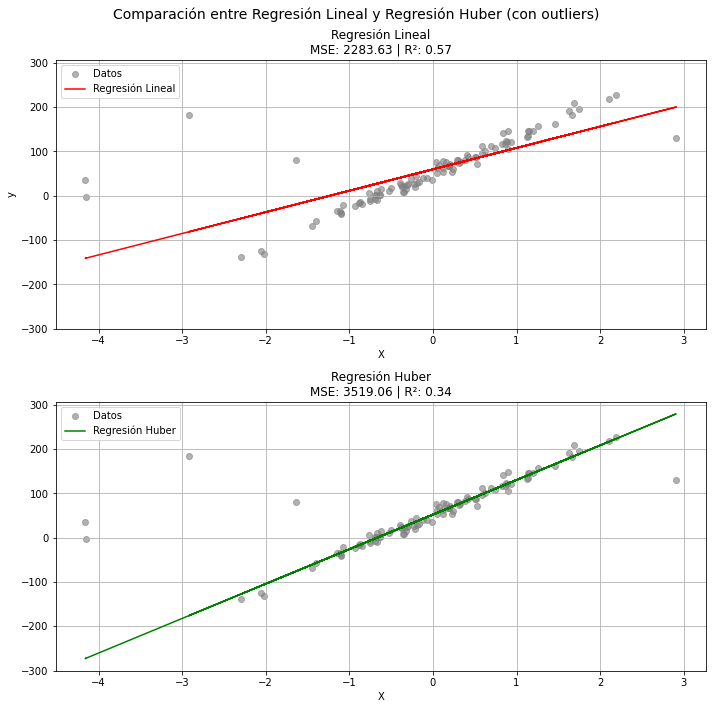

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression
import random

# Semillas para reproducibilidad
np.random.seed(42)
random.seed(42)

# 1. Generar datos artificiales con comportamiento lineal
X, y = make_regression(n_samples=100, n_features=1, noise=10, bias=50, random_state=1)

# 2. Agregar outliers a las primeras 5 muestras en X
for i in range(5):
    factor = random.randint(2, 4)
    if random.random() > 0.5:
        X[i] += factor * X.std()
    else:
        X[i] -= factor * X.std()

# 3. Ajustar modelos
lr = LinearRegression()
huber = HuberRegressor()

lr.fit(X, y)
huber.fit(X, y)

# 4. Predicciones
y_pred_lr = lr.predict(X)
y_pred_huber = huber.predict(X)

# 5. Métricas
# 5. Métricas
mse_lr = mean_squared_error(y, y_pred_lr)
r2_lr = r2_score(y, y_pred_lr)

mse_huber = mean_squared_error(y, y_pred_huber)
r2_huber = r2_score(y, y_pred_huber)

mae_lr = mean_absolute_error(y, y_pred_lr)
mae_huber = mean_absolute_error(y, y_pred_huber)

print("Regresión Lineal")
print("MSE:", mse_lr)
print('MAE:', mae_lr )
print("R2:", r2_lr)

print("\nRegresión Huber")
print("MSE:", mse_huber)
print('MAE:', mae_huber)
print("R2:", r2_huber)

# 6. Visualización con subgráficas
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharey=True)

# Subgráfica Regresión Lineal
axes[0].scatter(X, y, label="Datos", color='gray', alpha=0.6)
axes[0].plot(X, y_pred_lr, color='red', label="Regresión Lineal")
axes[0].set_title(f"Regresión Lineal\nMSE: {mse_lr:.2f} | R²: {r2_lr:.2f}")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].grid(True)

# Subgráfica Regresión Huber
axes[1].scatter(X, y, label="Datos", color='gray', alpha=0.6)
axes[1].plot(X, y_pred_huber, color='green', label="Regresión Huber")
axes[1].set_title(f"Regresión Huber\nMSE: {mse_huber:.2f} | R²: {r2_huber:.2f}")
axes[1].set_xlabel("X")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Comparación entre Regresión Lineal y Regresión Huber (con outliers)", fontsize=14)
plt.tight_layout()
plt.show()

